In [149]:
import pandas as pd

In [150]:
df = pd.read_csv('coffee_ratings.csv')  

In [151]:
print(df.info)

<bound method DataFrame.info of       total_cup_points  species                     owner country_of_origin  \
0                90.58  Arabica                 metad plc          Ethiopia   
1                89.92  Arabica                 metad plc          Ethiopia   
2                89.75  Arabica  grounds for health admin         Guatemala   
3                89.00  Arabica       yidnekachew dabessa          Ethiopia   
4                88.83  Arabica                 metad plc          Ethiopia   
...                ...      ...                       ...               ...   
1334             78.75  Robusta               luis robles           Ecuador   
1335             78.08  Robusta               luis robles           Ecuador   
1336             77.17  Robusta               james moore     United States   
1337             75.08  Robusta             cafe politico             India   
1338             73.75  Robusta             cafe politico           Vietnam   

                   

In [152]:
print(df.head(5))

   total_cup_points  species                     owner country_of_origin  \
0             90.58  Arabica                 metad plc          Ethiopia   
1             89.92  Arabica                 metad plc          Ethiopia   
2             89.75  Arabica  grounds for health admin         Guatemala   
3             89.00  Arabica       yidnekachew dabessa          Ethiopia   
4             88.83  Arabica                 metad plc          Ethiopia   

                                  farm_name lot_number       mill ico_number  \
0                                 metad plc        NaN  metad plc  2014/2015   
1                                 metad plc        NaN  metad plc  2014/2015   
2  san marcos barrancas "san cristobal cuch        NaN        NaN        NaN   
3     yidnekachew dabessa coffee plantation        NaN    wolensu        NaN   
4                                 metad plc        NaN  metad plc  2014/2015   

                                 company       altitude  ...  

In [153]:
print(df.isnull().sum())

total_cup_points            0
species                     0
owner                       7
country_of_origin           1
farm_name                 359
lot_number               1063
mill                      318
ico_number                157
company                   209
altitude                  226
region                     59
producer                  232
number_of_bags              0
bag_weight                  0
in_country_partner          0
harvest_year               47
grading_date                0
owner_1                     7
variety                   226
processing_method         170
aroma                       0
flavor                      0
aftertaste                  0
acidity                     0
body                        0
balance                     0
uniformity                  0
clean_cup                   0
sweetness                   0
cupper_points               0
moisture                    0
category_one_defects        0
quakers                     1
color     

### I will use the altitude to see the correlation with the total cup points. 

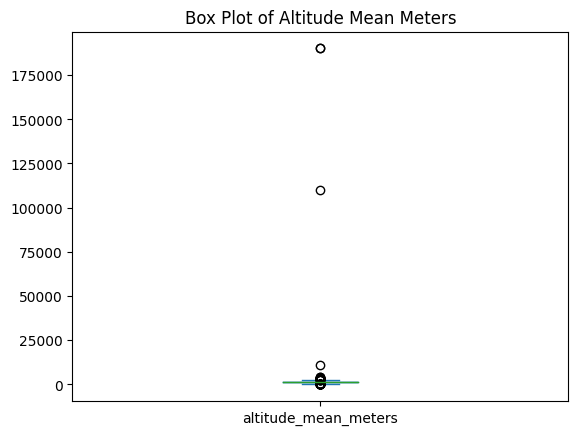

In [154]:
import matplotlib.pyplot as plt

df['altitude_mean_meters'].plot(kind='box', title='Box Plot of Altitude Mean Meters')
plt.show()


In [155]:

print(df.groupby('country_of_origin')['altitude_mean_meters'].apply(lambda x: x.isnull().mean()))

country_of_origin
Brazil                          0.204545
Burundi                         0.000000
China                           0.000000
Colombia                        0.180328
Costa Rica                      0.098039
Cote d?Ivoire                   0.000000
Ecuador                         0.333333
El Salvador                     0.095238
Ethiopia                        0.318182
Guatemala                       0.138122
Haiti                           0.000000
Honduras                        0.037736
India                           0.142857
Indonesia                       0.100000
Japan                           0.000000
Kenya                           0.080000
Laos                            0.000000
Malawi                          0.000000
Mauritius                       0.000000
Mexico                          0.016949
Myanmar                         0.000000
Nicaragua                       0.307692
Panama                          0.000000
Papua New Guinea                0.00000

### as there are clear outliars and country correlation with the alltitude, I will fill the null with the mean value calculated within the country.

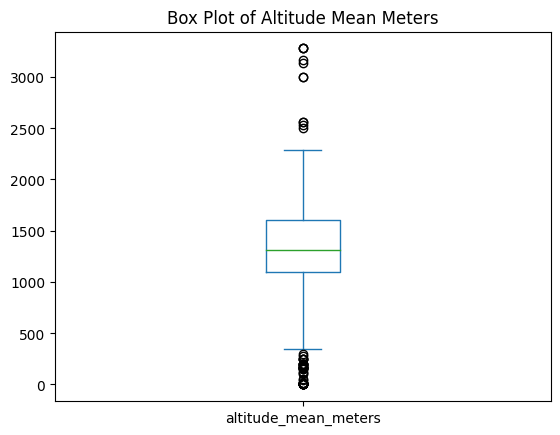

In [156]:
high_altitude_threshold = df['altitude_mean_meters'].quantile(0.99)
df = df[df['altitude_mean_meters'] <= high_altitude_threshold]
df['altitude_mean_meters'].plot(kind='box', title='Box Plot of Altitude Mean Meters')
plt.show()

In [157]:
country_median_altitudes = df.groupby('country_of_origin')['altitude_mean_meters'].median()
df['altitude_mean_meters'] = df.apply(
    lambda row: country_median_altitudes[row['country_of_origin']] if pd.isnull(row['altitude_mean_meters']) else row['altitude_mean_meters'],
    axis=1
)


In [158]:
print(df["altitude_mean_meters"].isnull().sum())

0


### Inspect the total_cup_points column

In [159]:
print(df["total_cup_points"].describe())
print(df[df["total_cup_points"] == 0])

count    1098.000000
mean       82.124199
std         3.613312
min         0.000000
25%        81.250000
50%        82.500000
75%        83.580000
max        90.580000
Name: total_cup_points, dtype: float64
      total_cup_points  species            owner country_of_origin  \
1310               0.0  Arabica  bismarck castro          Honduras   

         farm_name lot_number                mill  ico_number  \
1310  los hicaques        103  cigrah s.a de c.v.  13-111-053   

                company altitude  ...  color category_two_defects  \
1310  cigrah s.a de c.v     1400  ...  Green                    2   

            expiration            certification_body  \
1310  April 28th, 2018  Instituto Hondureño del Café   

                         certification_address  \
1310  b4660a57e9f8cc613ae5b8f02bfce8634c763ab4   

                         certification_contact unit_of_measurement  \
1310  7f521ca403540f81ec99daec7da19c2788393880                   m   

     altitude_low_meters al

In [160]:
df= df[df["total_cup_points"]>0]

### Inspect teh country_of_origin

In [161]:
print(df["country_of_origin"].describe())

count       1097
unique        36
top       Mexico
freq         232
Name: country_of_origin, dtype: object


In [162]:

df = df.dropna(subset=['country_of_origin'])

print(df['country_of_origin'].isnull().sum())


0


# Preparation

In [163]:
def categorize_cup_points(avg_points):
    if avg_points > 85:
        return 'High Quality'
    elif avg_points > 80:
        return 'Medium Quality'
    else:
        return 'Low Quality'
    
def categorize_altitude(avg_altitude):
    if avg_altitude > 1500:
        return 'Very High'
    elif avg_altitude > 1000:
        return 'High'
    elif avg_altitude > 500:
        return 'Medium'
    else:
        return 'Low'


In [164]:
country_cup_points_avg = df.groupby('country_of_origin')['total_cup_points'].transform('mean')
country_altitude_avg = df.groupby('country_of_origin')['altitude_mean_meters'].transform('mean')
country_entry_counts = df.groupby('country_of_origin')['total_cup_points'].transform('count')

In [165]:
df['country_cup_points_avg'] = country_cup_points_avg
df['avg_altitude_per_country'] = country_altitude_avg
df['country_entry_counts'] = country_entry_counts

In [166]:
df['quality_category'] = df['country_cup_points_avg'].apply(categorize_cup_points)
df['quality_category_each'] = df['total_cup_points'].apply(categorize_cup_points)
df['altitude_category'] = df['avg_altitude_per_country'].apply(categorize_altitude)

In [167]:
print(df["avg_altitude_per_country"].count(), df["altitude_category"].count())

1097 1097


In [168]:
country_coords = pd.read_csv('average-latitude-longitude-countries.csv')

country_coords.rename(columns={
    'Country': 'country_of_origin',
    'Latitude': 'latitude',
    'Longitude': 'longitude'
}, inplace=True)

In [169]:

unique_countries_df = set(df['country_of_origin'].unique())
unique_countries_coords = set(country_coords['country_of_origin'].unique())


missing_countries = unique_countries_df - unique_countries_coords

extra_countries = unique_countries_coords - unique_countries_df

print("Countries in df not in country_coords:", missing_countries)
print("Countries in country_coords not in df:", extra_countries)


Countries in df not in country_coords: {'Tanzania, United Republic Of', 'Cote d?Ivoire', 'United States (Puerto Rico)', 'Laos', 'United States (Hawaii)'}
Countries in country_coords not in df: {'Djibouti', 'Russian Federation', 'Vanuatu', 'Guyana', 'Gambia', 'Saint Vincent and the Grenadines', 'Iraq', 'Eritrea', 'Iran, Islamic Republic of', 'Namibia', 'Kyrgyzstan', 'Qatar', 'Norway', 'United States Minor Outlying Islands', 'Sierra Leone', 'Estonia', 'Puerto Rico', 'Venezuela', 'Palau', 'Togo', 'Albania', 'Malta', 'Netherlands Antilles', 'Finland', 'Jamaica', 'Falkland Islands (Malvinas)', 'Morocco', 'Heard Island and McDonald Islands', 'United Arab Emirates', 'Swaziland', 'Afghanistan', 'Mayotte', 'Niger', 'Marshall Islands', 'Saint Helena', 'Saint Lucia', 'Zimbabwe', 'Iceland', 'Belgium', 'French Southern Territories', 'Sudan', 'Luxembourg', 'Austria', 'Australia', 'Italy', 'Saint Pierre and Miquelon', 'Angola', 'Burkina Faso', 'Macedonia', 'Croatia', 'Belarus', 'Solomon Islands', 'Se

In [170]:
country_name_mapping = {
    'Tanzania, United Republic Of': 'Tanzania, United Republic of',
    'United States (Puerto Rico)': 'Puerto Rico',
    'United States (Hawaii)': 'United States',  
    'Cote d?Ivoire': "Cote d'Ivoire",
    'Laos': "Lao People's Democratic Republic"
}

df['country_of_origin'] = df['country_of_origin'].replace(country_name_mapping)


In [171]:
df = df.merge(country_coords, on='country_of_origin', how='left')
print(df.head(5))

   total_cup_points  species                     owner country_of_origin  \
0             90.58  Arabica                 metad plc          Ethiopia   
1             89.92  Arabica                 metad plc          Ethiopia   
2             89.75  Arabica  grounds for health admin         Guatemala   
3             89.00  Arabica       yidnekachew dabessa          Ethiopia   
4             88.83  Arabica                 metad plc          Ethiopia   

                                  farm_name lot_number       mill ico_number  \
0                                 metad plc        NaN  metad plc  2014/2015   
1                                 metad plc        NaN  metad plc  2014/2015   
2  san marcos barrancas "san cristobal cuch        NaN        NaN        NaN   
3     yidnekachew dabessa coffee plantation        NaN    wolensu        NaN   
4                                 metad plc        NaN  metad plc  2014/2015   

                                 company       altitude  ...  

In [172]:
df.columns

Index(['total_cup_points', 'species', 'owner', 'country_of_origin',
       'farm_name', 'lot_number', 'mill', 'ico_number', 'company', 'altitude',
       'region', 'producer', 'number_of_bags', 'bag_weight',
       'in_country_partner', 'harvest_year', 'grading_date', 'owner_1',
       'variety', 'processing_method', 'aroma', 'flavor', 'aftertaste',
       'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness',
       'cupper_points', 'moisture', 'category_one_defects', 'quakers', 'color',
       'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters',
       'country_cup_points_avg', 'avg_altitude_per_country',
       'country_entry_counts', 'quality_category', 'quality_category_each',
       'altitude_category', 'ISO 3166 Country Code', 'latitude', 'longitude'],
      dtype='object')

In [173]:

columns_to_keep = [
    'total_cup_points', 
    'country_of_origin', 
    'altitude_mean_meters', 
    'latitude',
    'longitude' ,
    'country_cup_points_avg',
    'avg_altitude_per_country',
    'quality_category',
    'altitude_category',
    'quality_category_each',
    'country_entry_counts'
]

df_selected = df[columns_to_keep].copy()


df_selected.to_csv('selected_coffee_data.csv', index=False)

